In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
tf.__version__

'2.4.1'

In [4]:
keras.__version__


'2.4.0'

In [6]:
fashion = keras.datasets.fashion_mnist
(X_train_full, y_train_full),( X_test, y_test) = fashion.load_data()

In [8]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [9]:
print(X_test.shape)
print(X_test.dtype)

(10000, 28, 28)
uint8


In [10]:
print(y_train_full.shape)
print(y_train_full.dtype)

(60000,)
uint8


In [11]:
print(y_test.shape)
print(y_test.dtype)

(10000,)
uint8


In [12]:
X_train_full[0:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,
           0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,
           4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,
           0,  12,  10

In [13]:
y_train_full[0:1]

array([9], dtype=uint8)

In [23]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [19]:
class_name =['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [26]:
class_name[y_train[0]]


'Coat'

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape= [28,28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(200, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 316,810
Trainable params: 316,810
Non-trainable params: 0
_________________________________________________________________


In [30]:
loss = keras.losses.sparse_categorical_crossentropy
optimizer = keras.optimizers.SGD()
metrics = ["accuracy"]
model.compile(loss = loss, optimizer = optimizer, metrics = metrics)


In [31]:
hist = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 15s 8ms/step - loss: 1.0356 - accuracy: 0.6665 - val_loss: 0.4847 - val_accuracy: 0.8402
Epoch 2/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4964 - accuracy: 0.8251 - val_loss: 0.4409 - val_accuracy: 0.8486
Epoch 3/30
1719/1719 [==============================] - 15s 8ms/step - loss: 0.4385 - accuracy: 0.8473 - val_loss: 0.4012 - val_accuracy: 0.8630
Epoch 4/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.4080 - accuracy: 0.8566 - val_loss: 0.3726 - val_accuracy: 0.8744
Epoch 5/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3814 - accuracy: 0.8646 - val_loss: 0.3666 - val_accuracy: 0.8706
Epoch 6/30
1719/1719 [==============================] - 15s 9ms/step - loss: 0.3671 - accuracy: 0.8687 - val_loss: 0.3903 - val_accuracy: 0.8614
Epoch 7/30
1719/1719 [==============================] - 16s 9ms/step - loss: 0.3439 - accuracy: 0.8760 - val_loss: 0.3524 - val_ac

In [32]:
import pandas as pd 
import matplotlib.pyplot as plt

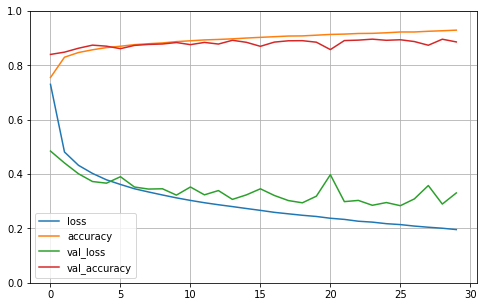

In [36]:
pd.DataFrame(hist.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [37]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 3s 7ms/step - loss: 80.1673 - accuracy: 0.8213


[80.16732025146484, 0.8213000297546387]

In [38]:
X_new = X_test[:5]

In [39]:
y_proba =model.predict(X_new)

In [83]:
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [49]:
import numpy as np 

y_pred = np.argmax(model.predict(X_new), axis = -1)
y_pred

array([9, 2, 1, 1, 6])

In [52]:
np.array(class_name)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt'],
      dtype='<U11')

# Regression MLP using Sequential API

In [53]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [54]:
housing = fetch_california_housing()

In [55]:
Xh_train_full , Xh_test, yh_train_full, yh_test = train_test_split(housing.data, housing.target)
Xh_train , Xh_valid, yh_train, yh_valid = train_test_split(Xh_train_full, yh_train_full)

In [56]:
scaler = StandardScaler()


In [57]:
Xh_train= scaler.fit_transform(Xh_train)
Xh_valid = scaler.transform(Xh_valid)
Xh_test = scaler.transform(Xh_test

In [84]:
Xh_train.shape[1:]

(8,)

In [73]:
modelh = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu', input_shape= Xh_train.shape[1:]),
    keras.layers.Dense(1)
])

In [75]:
lossh = keras.losses.mean_squared_error
optimizerh = keras.optimizers.SGD()
modelh.compile(loss = lossh, optimizer = optimizerh)

In [76]:
histh = modelh.fit(Xh_train, yh_train,epochs=20, validation_data=(Xh_valid, yh_valid))

Epoch 1/20
363/363 [==============================] - 3s 6ms/step - loss: 1.4731 - val_loss: 0.6485
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5451 - val_loss: 0.4786
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4776 - val_loss: 0.4461
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4467 - val_loss: 0.4265
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4172 - val_loss: 0.4067
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4063 - val_loss: 0.4026
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3904 - val_loss: 0.3920
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3916 - val_loss: 0.3880
Epoch 9/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3776 - val_loss: 0.5881
Epoch 10/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4484 - val_loss: 0.3866

In [77]:
mse_test = modelh.evaluate(Xh_test,yh_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.3652


In [78]:
Xh_new = Xh_test[:5]

In [80]:
yh_pred = modelh.predict(Xh_new)

In [81]:
yh_pred

array([[1.5418736],
       [2.1523185],
       [1.0552671],
       [2.4975772],
       [2.2500181]], dtype=float32)

In [82]:
yh_test[:5]

array([2.116, 2.119, 1.07 , 3.938, 1.734])

# Subclassing API

In [85]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units = 30, activation = "relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units,activation = activation)
        self.hidden2 = keras.layers.Dense(units,activation = activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        inputA, inputB = inputs
        hidden1 = self.hidden1(inputB)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([inputA, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output
    

In [86]:
model = WideAndDeepModel()